TABLE OF CONTENTS

I -
   - Problem / Data Set Information
   - Importing Libraries
   - Loading Data / Exploratory Data Analysis
   - Correlation between Numeric Variable
   - Relationship between categorical variables and target variable by using chi-square test
   - Visualization
   - Checking missing values in the Dataset
   - Handling missing values
   - Convert Categorical variables into Numerical

II -  Random forest
   - Train Test Split
   - Feature Scaling 
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features

III -  Decision tree
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Visualisation de l'arbre de décision
   - Tracé de l'importance des features
   - Comparaison des performances

IV - Adaboost
   - Entrainement du modèle
   - Evaluation du modele
   - Evaluation avec d'autres métriques
   - Matrice de confusion
   - Tracé de l'importance des features

V -  XGBoost Classifier
  - Entrainement du modele
  - Evaluation du modele
  - Matrice de confusion

VI - Comparaison des performances


# I - 

### Problem / Data Set Information

# Prédire avec random forest classifier, decision tree classifier, adaboost, xgboost la souscription d'un client à un service bancaire 
Les données sont liées aux campagnes de marketing d'une institution bancaire portugaise. Ces campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plusieurs contacts avec le même client étaient nécessaires pour savoir si le client va souscrire ou non à un service bancaire. 

L'objectif de la classification est de prédire si le client va souscrire (yes/no) à un service bancaire.

Les variables explicatives sont :

- age : age du client 
- job : type de job du client (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : état matrimonial
- education : niveau d'études (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default : has credit in default? (categorical: 'no','yes','unknown')
- balance : 
- housing : a un prêt au logement ? (categorical: 'no','yes','unknown') 
- loan : a un prêt personnel ? (categorical: 'no','yes','unknown') 
- contact : type de communication de contact (categorical: 'cellular','telephone')
- day : dernier jour de contact de la semaine (categorical: 'mon','tue','wed','thu','fri')   
- month : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration : durée du dernier contact, en secondes (numérique) 
- campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous : number of contacts performed before this campaign and for this client (numeric)
- poutcome : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

La variable de sortie : 
- **y : le client a-t-il souscrit a un service bancaire**

### Importing Libraries

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np
import category_encoders as ce

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn import metrics

# Stats
from scipy import stats
from scipy.stats import chi2_contingency

# Others
import warnings  
warnings.filterwarnings('ignore')

### Loading Data / Exploratory Data Analysis

In [4]:
# Load data 
data = pd.read_csv('bank.csv', sep=';')

# Rename column target 'y' to 'souscription'
data.rename(columns={"y": "souscription"}, inplace=True)

# Affichage des 5 premieres lignes du data train
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,souscription
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
# Nombre de lignes et de colonnes des data
data.shape

(4521, 17)

In [6]:
# Noms des attributs
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'souscription'],
      dtype='object')

In [7]:
# Types des variables
data.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
souscription    object
dtype: object

In [8]:
# Infos sur le dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           4521 non-null   int64 
 1   job           4521 non-null   object
 2   marital       4521 non-null   object
 3   education     4521 non-null   object
 4   default       4521 non-null   object
 5   balance       4521 non-null   int64 
 6   housing       4521 non-null   object
 7   loan          4521 non-null   object
 8   contact       4521 non-null   object
 9   day           4521 non-null   int64 
 10  month         4521 non-null   object
 11  duration      4521 non-null   int64 
 12  campaign      4521 non-null   int64 
 13  pdays         4521 non-null   int64 
 14  previous      4521 non-null   int64 
 15  poutcome      4521 non-null   object
 16  souscription  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
# Répartition des observations
data['souscription'].value_counts()

no     4000
yes     521
Name: souscription, dtype: int64

- 88.48% des personnes contactées n'ont pas souscrit à un service bancaire (no).
- 11.52% des personnes contactées ont souscrit à un service bancaire (yes).

In [10]:
# Basic statistics on numeric features 
data.describe()
# data.select_dtypes(exclude=["object"]).describe() # First, drop categorical variables then apply describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Correlation between Numeric Variable

Let's find correlation between Numeric Variable

In [11]:
# New dataframe to calculate correlation between numeric features
corr_df = data.copy()
# corr_df = data.drop(['y'], axis=1, inplace=False).select_dtypes(exclude=["object"])
#cor= corr_df.corr(method='pearson')
#print(cor)

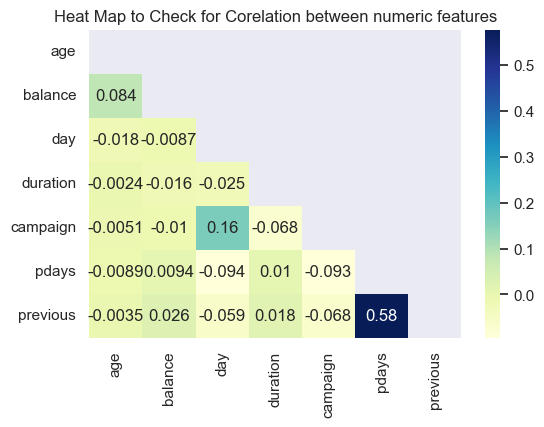

In [12]:
# Heat Map to Check for Corelation between numeric features
plt.figure(figsize=(6, 4)) # Augmenter figsize en cas de problème de visualisation
mask = np.triu(np.ones_like(corr_df.corr(method='pearson')))
sns.set(rc = {'figure.figsize':(26, 24)})
sns.heatmap(corr_df.corr(method='pearson'), cmap="YlGnBu", annot=True, mask=mask)
plt.title("Heat Map to Check for Corelation between numeric features");

In [13]:
# Moyenne de chaque variable explicative numérique calculée dans chaque classe (yes, no)
# m = data.select_dtypes(exclude=["object"]).groupby('y').mean()
m = data.groupby('souscription').mean()
m

,age,balance,day,duration,campaign,pdays,previous
souscription,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


### Relationship between categorical variables and target variable by using chi-square test

Let's use chi-square test to understand relationship between categorical variables and target variable

In [14]:
# Categorical variables 
categorical_variables = data.select_dtypes(include=["object"]).drop(['souscription'], axis=1, inplace=False).columns
categorical_variables

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [15]:
# Calcul P-value de chaque variable categorielle

P_values = [] # Pour stocker les valeurs de P-value
for cat_feature in categorical_variables:
    csq = chi2_contingency(pd.crosstab(data['souscription'], data[cat_feature]))  # P-value of the variable 
    P_values.append(csq[1])
    
dataframe_P_values = pd.DataFrame({'categorical_variables':categorical_variables, 'P-value':P_values})
dataframe_P_values.sort_values('P-value', ascending=True, inplace=False)


,categorical_variables,P-value
8,poutcome,1.539883e-83
7,month,2.195355e-47
6,contact,8.304301e-20
4,housing,2.714700e-12
0,job,1.901391e-10
5,loan,2.914829e-06
1,marital,7.373535e-05
2,education,1.625240e-03
3,default,1.000000e+00


P values for all features except 'default', are very low. So we can reject our Null Hypothesis which is these features are independent and have no relationship with target variable.

So these features contribute by providing some information.

P value of the variable 'default' > 0.05, we keep our Hypothesis for this variable.

### Visualization

In [16]:
# L'écart absolu des moyennes intra classe dans chaque variable explicative
ecart_moyenne = pd.DataFrame({'features':m.columns, 'ecart moyenne':abs(m.iloc[0,:] - m.iloc[1,:]).values})
ecart_moyenne.sort_values('ecart moyenne', ascending=False, inplace=True)
ecart_moyenne

,features,ecart moyenne
3,duration,326.395302
1,balance,168.744104
5,pdays,32.633155
0,age,1.493363
6,previous,0.618961
4,campaign,0.595455
2,day,0.290401


Le calcul de l'écart absolu des moyennes intra classe sur chaque variable explicative mesure la différence de dispersion de celle ci sur les deux classes. 

Ci-dessous est une visualisation de quelques features :

First let's check the impact of feature duration on souscription

Text(0.5, 1.0, 'Impact of duration on souscription')

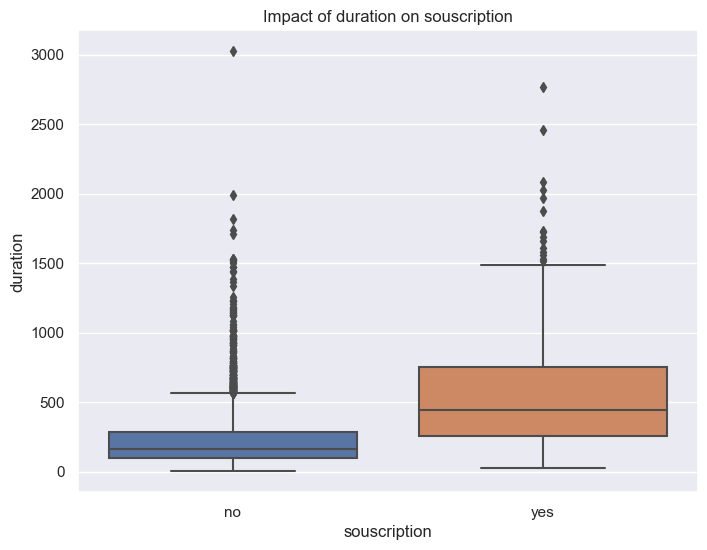

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.souscription, y=data.duration)
plt.title('Impact of duration on souscription')

Plus la variable 'duration' (durée de l'appel) augmente plus il y a de chance pour que le client souscrit à un service bancaire.

Text(0.5, 1.0, 'Impact of balance on souscription')

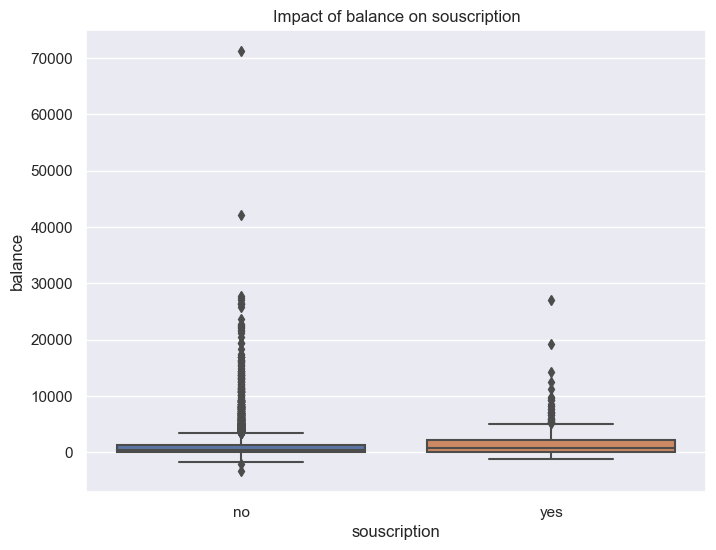

In [18]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.souscription, y=data.balance)
plt.title('Impact of balance on souscription')

Text(0.5, 1.0, 'Impact of pdays on souscription')

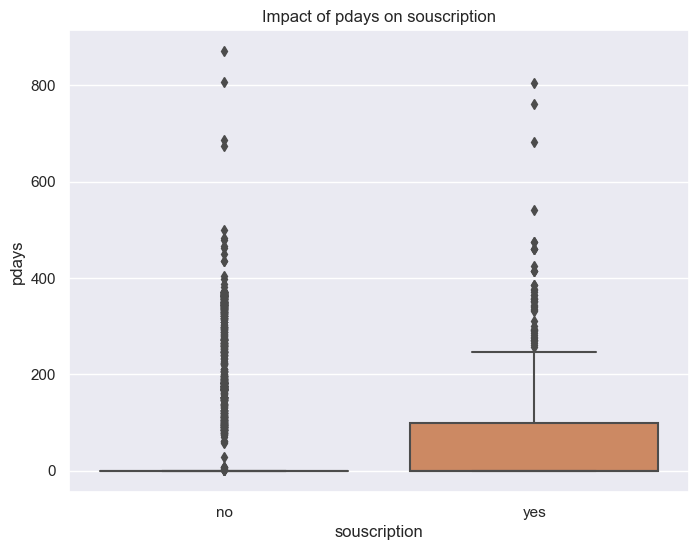

In [19]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.souscription, y=data.pdays)
plt.title('Impact of pdays on souscription')

Text(0.5, 1.0, 'Impact of age on souscription')

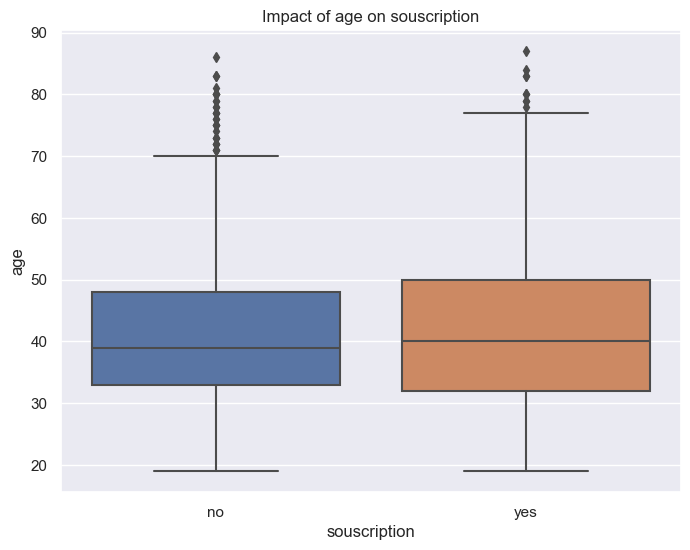

In [20]:
fig, ax=plt.subplots(figsize=(8,6))
#plt.figure()
sns.boxplot(x=data.souscription, y=data.age)
plt.title('Impact of age on souscription')

Text(0.5, 1.0, 'Impact of poutcome on souscription')

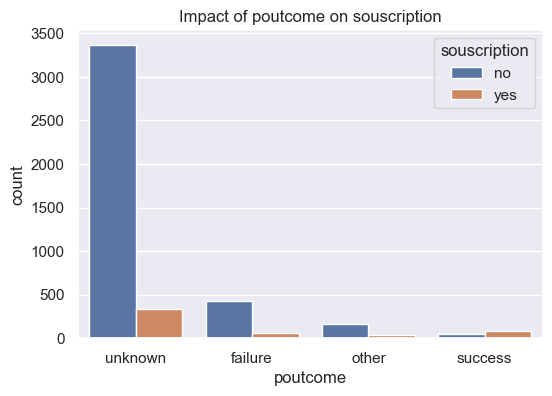

In [21]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="poutcome", hue="souscription", data=data)
plt.title('Impact of poutcome on souscription')

Text(0.5, 1.0, 'Impact of month on souscription')

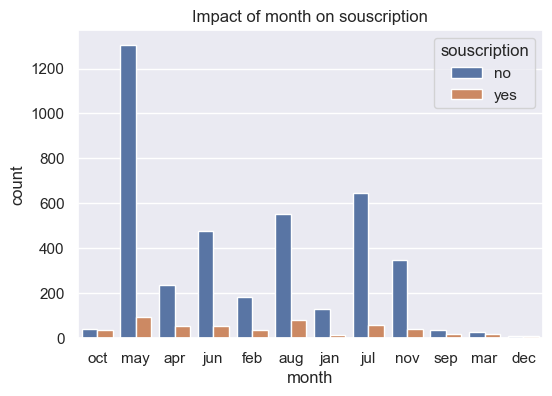

In [22]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="month", hue="souscription", data=data)
plt.title('Impact of month on souscription')

Text(0.5, 1.0, 'Impact of contact on souscription')

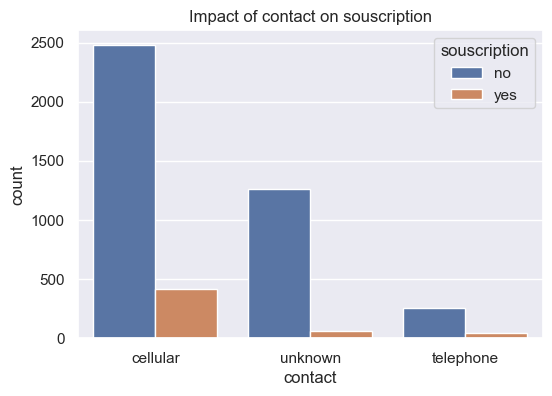

In [23]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="contact", hue="souscription", data=data)
plt.title('Impact of contact on souscription')

Text(0.5, 1.0, 'Impact of housing on souscription')

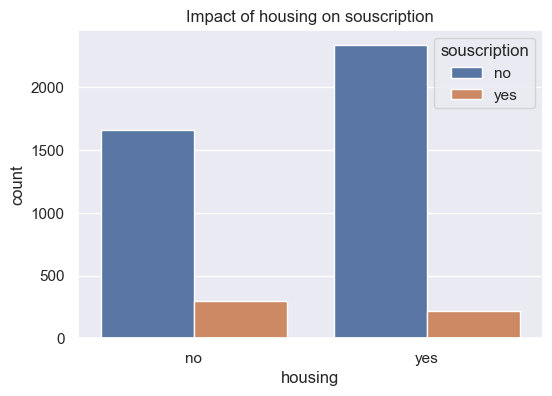

In [24]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="housing", hue="souscription", data=data)
plt.title('Impact of housing on souscription')

Text(0.5, 1.0, 'Impact of job on souscription')

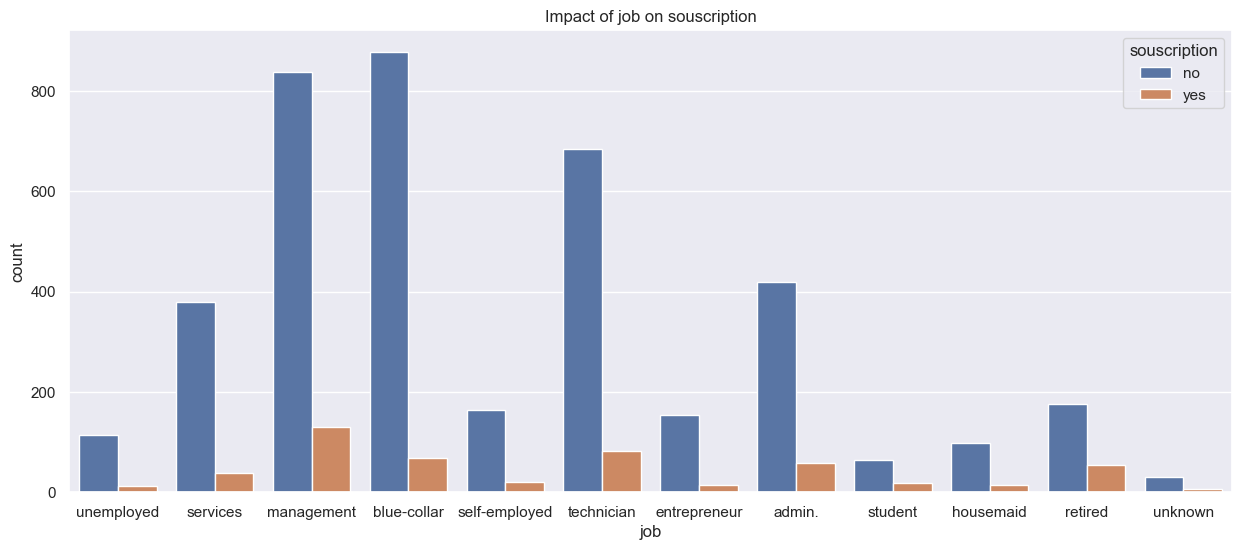

In [25]:
fig, ax=plt.subplots(figsize=(15,6))
sns.countplot(x="job", hue="souscription", data=data)
plt.title('Impact of job on souscription')

Text(0.5, 1.0, 'Impact of loan on souscription')

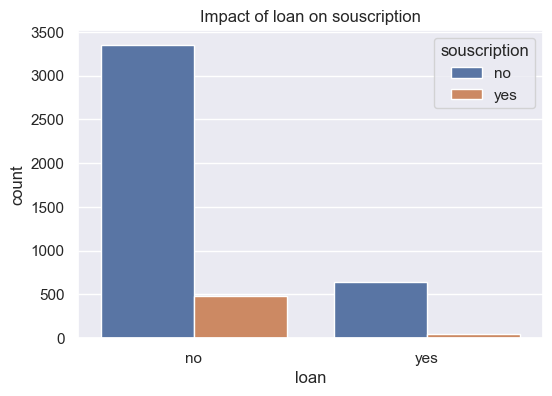

In [26]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="loan", hue="souscription", data=data)
plt.title('Impact of loan on souscription')

Text(0.5, 1.0, 'Impact of marital on souscription')

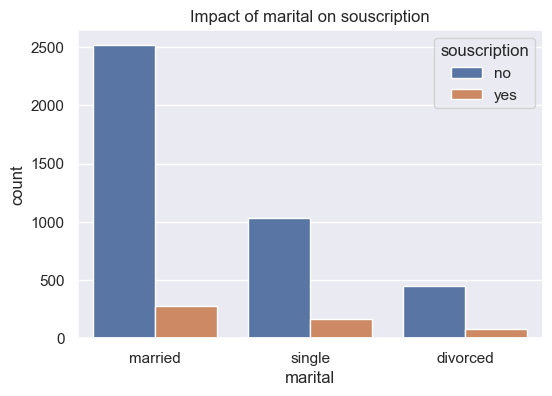

In [27]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="marital", hue="souscription", data=data)
plt.title('Impact of marital on souscription')

Text(0.5, 1.0, 'Impact of education on souscription')

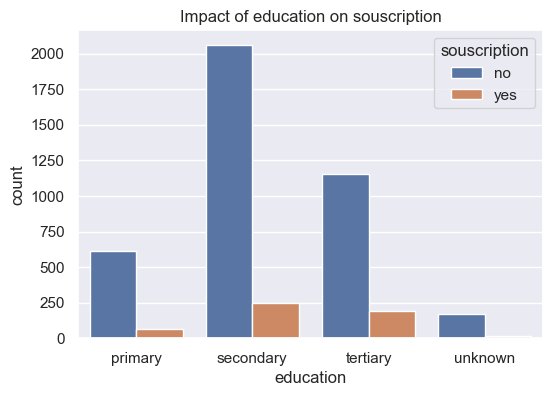

In [28]:
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot(x="education", hue="souscription", data=data)
plt.title('Impact of education on souscription')

### Checking missing values in the Dataset

In [29]:
# Let's check which features contain missing values
pd.isnull(data).sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
souscription    0
dtype: int64

No variable has a missing value

### Handling Missing Values

Empty part

### Convert Categorical variables into Numerical

In [30]:
# Convert Categorical variables into Numerical
encoder = ce.OrdinalEncoder(cols=data.select_dtypes(include=["object"]).drop(['souscription'], axis=1, inplace=False).columns)

data = encoder.fit_transform(data)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,souscription
0,30,1,1,1,1,1787,1,1,1,19,1,79,1,-1,0,1,no
1,33,2,1,2,1,4789,2,2,1,11,2,220,1,339,4,2,no
2,35,3,2,3,1,1350,2,1,1,16,3,185,1,330,1,2,no
3,30,3,1,3,1,1476,2,2,2,3,4,199,4,-1,0,1,no
4,59,4,1,2,1,0,2,1,2,5,2,226,1,-1,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,1,2,1,-333,2,1,1,30,8,329,5,-1,0,1,no
4517,57,5,1,3,2,-3313,2,2,2,9,2,153,1,-1,0,1,no
4518,57,6,1,2,1,295,1,1,1,19,6,151,11,-1,0,1,no
4519,28,4,1,2,1,1137,1,1,1,6,5,129,4,211,3,3,no


# II -  Random forest

#### Train Test Split

In [31]:
X = data.drop(['souscription'], axis = 1, inplace = False)
y = data['souscription']

# Data train (X_train, y_train) and data test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 123)

#### Feature Scaling 

Empty part

###  Entrainement du modele

In [166]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid_rdf = { 
    'n_estimators': [100, 400, 700, 1000], #, 1300], # On pourrait utiliser np.arange() pour plus de valeurs
    #"bootstrap": [True, False],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt'], #'log2'],
    'max_depth' : [2, 3, 4, 5,  6], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['gini'] #, 'entropy']
}

rfc=RandomForestClassifier(random_state=42, bootstrap=True, n_jobs=-1)

# Grid Search to Search through all the combination of values
CV_rfc = GridSearchCV(
    estimator=rfc, 
    param_grid=param_grid_rdf, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [167]:
# Entrainement du modèle
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000]},
             scoring='accuracy', verbose=2)

In [168]:
# To view all the parameters used
CV_rfc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000]},
             scoring='accuracy', verbose=2)>

In [169]:
# We can view the best parameters from fitting the grid search:
print(CV_rfc.best_params_) 

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 100}


In [ ]:
# print(CV_rfc.best_score_) 
# print(CV_rfc.cv_results_)

###  Evaluation du modele

In [32]:
# Now let's run the model with this parameters
random_forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    bootstrap=True,
    oob_score=True,
    random_state=123,
    max_depth=6,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=12,
    n_jobs=-1
)

random_forest.fit(X_train, y_train)
y_predict_rdf = random_forest.predict(X_test)


print("Accuracy random forest (data test): {:0.2f}%.".format(accuracy_score(y_test, y_predict_rdf) * 100))

print("oob score: {:0.2f}%.".format(random_forest.oob_score_ * 100))

Accuracy random forest (data test): 89.76%.
oob score: 89.48%.


### Evaluation avec d'autres métriques

In [33]:
#roc = roc_auc_score(y_test, y_predict)
acc_random_forest = accuracy_score(y_test, y_predict_rdf)
prec_random_forest = precision_score(y_test, y_predict_rdf, pos_label='yes')
rec_random_forest = recall_score(y_test, y_predict_rdf, pos_label='yes')
f1_random_forest = f1_score(y_test, y_predict_rdf, pos_label='yes')

model_results_random_forest = pd.DataFrame([['Random Forest', acc_random_forest, prec_random_forest, rec_random_forest, f1_random_forest]],
                             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_random_forest

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.897568,0.757576,0.160256,0.26455


### Matrice de confusion

[[1193    8]
 [ 131   25]]


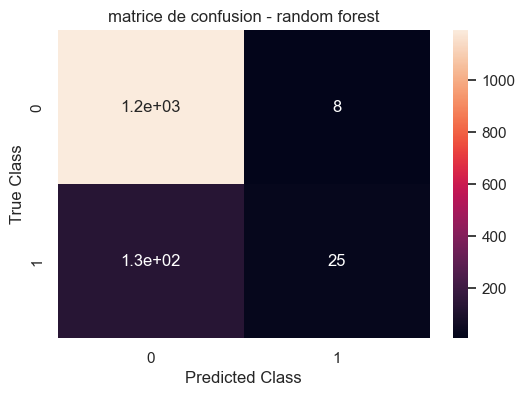

In [34]:
matrix_rdf = confusion_matrix(y_test, y_predict_rdf)
print(matrix_rdf)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_rdf, annot=True)
plt.title('matrice de confusion - random forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Tracé de l'importance des features

In [35]:
# Dataframe Features importances
df_feat = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : random_forest.feature_importances_})

df_feat.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat

,Features,Features_importances
11,duration,0.415135
15,poutcome,0.161697
10,month,0.095081
0,age,0.070114
13,pdays,0.049747
5,balance,0.040499
9,day,0.037127
14,previous,0.029471
1,job,0.024888
8,contact,0.016673


Text(0, 0.5, 'Feature names')

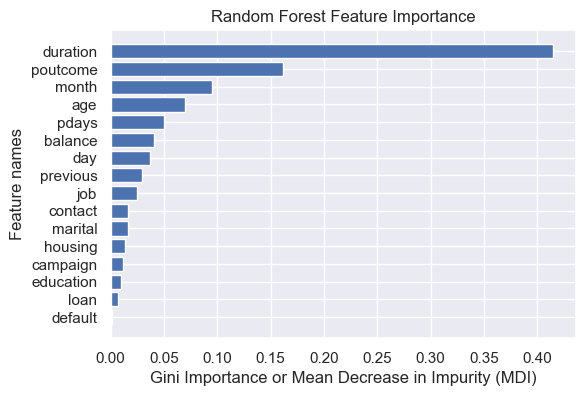

In [36]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat['Features'], df_feat['Features_importances'])
plt.title("Random Forest Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

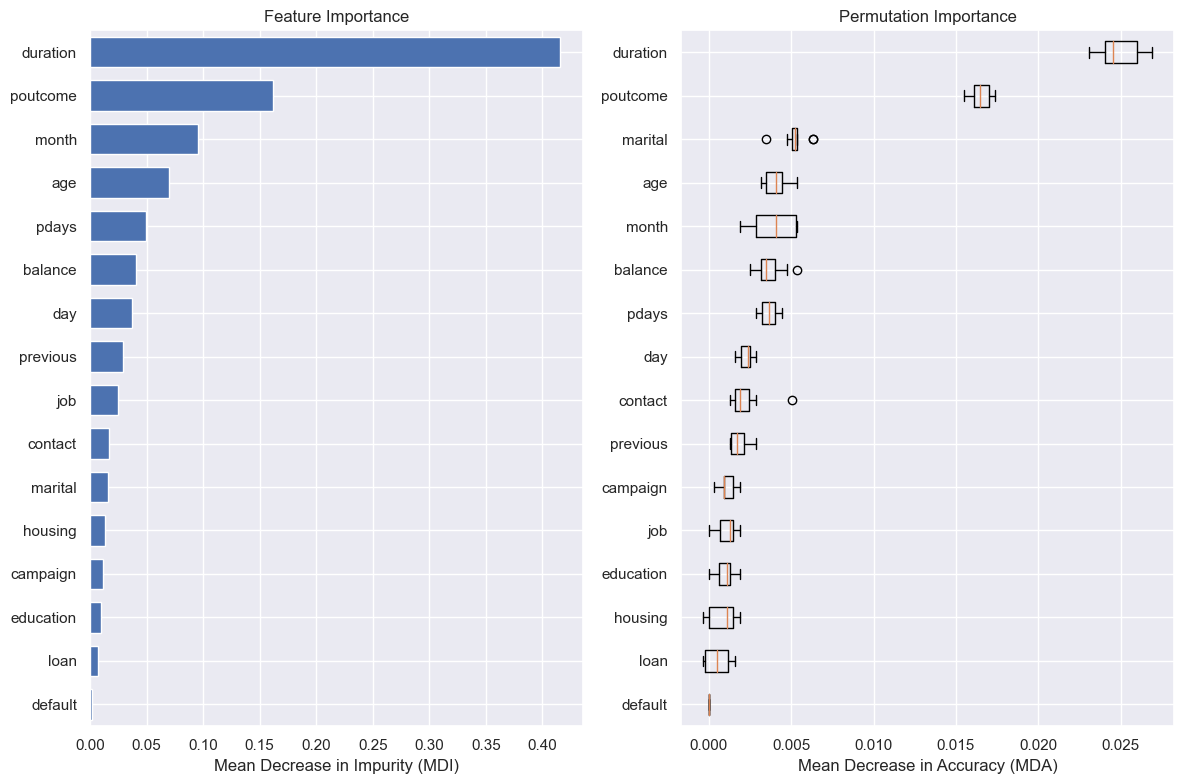

In [37]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(random_forest, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(random_forest.feature_importances_)
tree_indices = np.arange(0, len(random_forest.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, random_forest.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(random_forest.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# II -  Decision tree

###  Entrainement du modele

In [158]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
param_grid_dtc = { 
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],  # On pourrait utiliser np.arange() pour plus de valeurs
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], # On pourrait utiliser np.arange() pour plus de valeurs
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6, 7, 8], # On pourrait utiliser np.arange() pour plus de valeurs
    'criterion' :['gini', 'entropy']
}

dtc=DecisionTreeClassifier(random_state=42, splitter='best')

# Grid Search to Search through all the combination of values
CV_dtc = GridSearchCV(
    estimator=dtc, 
    param_grid=param_grid_dtc, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [159]:
# Entrainement du modèle
CV_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             scoring='accuracy', verbose=2)

In [160]:
# To view all the parameters used
CV_dtc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]},
             scoring='accuracy', verbose=2)>

In [161]:
# We can view the best parameters from fitting the grid search:
print(CV_dtc.best_params_) 

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 25}


In [ ]:
# print(CV_rfc.best_score_)
# print(CV_rfc.cv_results_)

###  Evaluation du modele

In [38]:
# Now let's run the model with this parameters
model_tree = DecisionTreeClassifier(
    criterion='entropy',
    random_state=123,
    max_depth=7,
    max_features='auto',
    min_samples_leaf=5,
    min_samples_split=25
)
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_tree.fit(X_train, y_train)
# Prédiction avec les données test
y_predict_dtc = model_tree.predict(X_test)

# Calcul du score du modèle 
print("Accuracy decision tree (data test): {:0.2f}%.".format(accuracy_score(y_test, y_predict_dtc) * 100))

Accuracy decision tree (data test): 88.50%.


### Evaluation avec d'autres métriques

In [39]:
# roc = roc_auc_score(y_test, y_predict2, pos_label='M')
acc_decision_tree = accuracy_score(y_test, y_predict_dtc)
prec_decision_tree = precision_score(y_test, y_predict_dtc, pos_label='yes')
rec_decision_tree = recall_score(y_test, y_predict_dtc, pos_label='yes')
f1_decision_tree = f1_score(y_test, y_predict_dtc, pos_label='yes')

model_results_decision_tree = pd.DataFrame([['Decision tree', acc_decision_tree, prec_decision_tree, rec_decision_tree, f1_decision_tree]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_decision_tree

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.885041,0.5,0.198718,0.284404


### Matrice de confusion

[[1170   31]
 [ 125   31]]


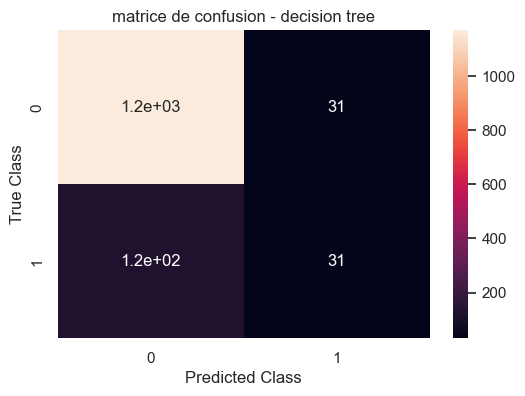

In [40]:
matrix_decision_tree = confusion_matrix(y_test, y_predict_dtc)
print(matrix_decision_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_decision_tree, annot=True)
plt.title('matrice de confusion - decision tree')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Visualisation de l'arbre de décision

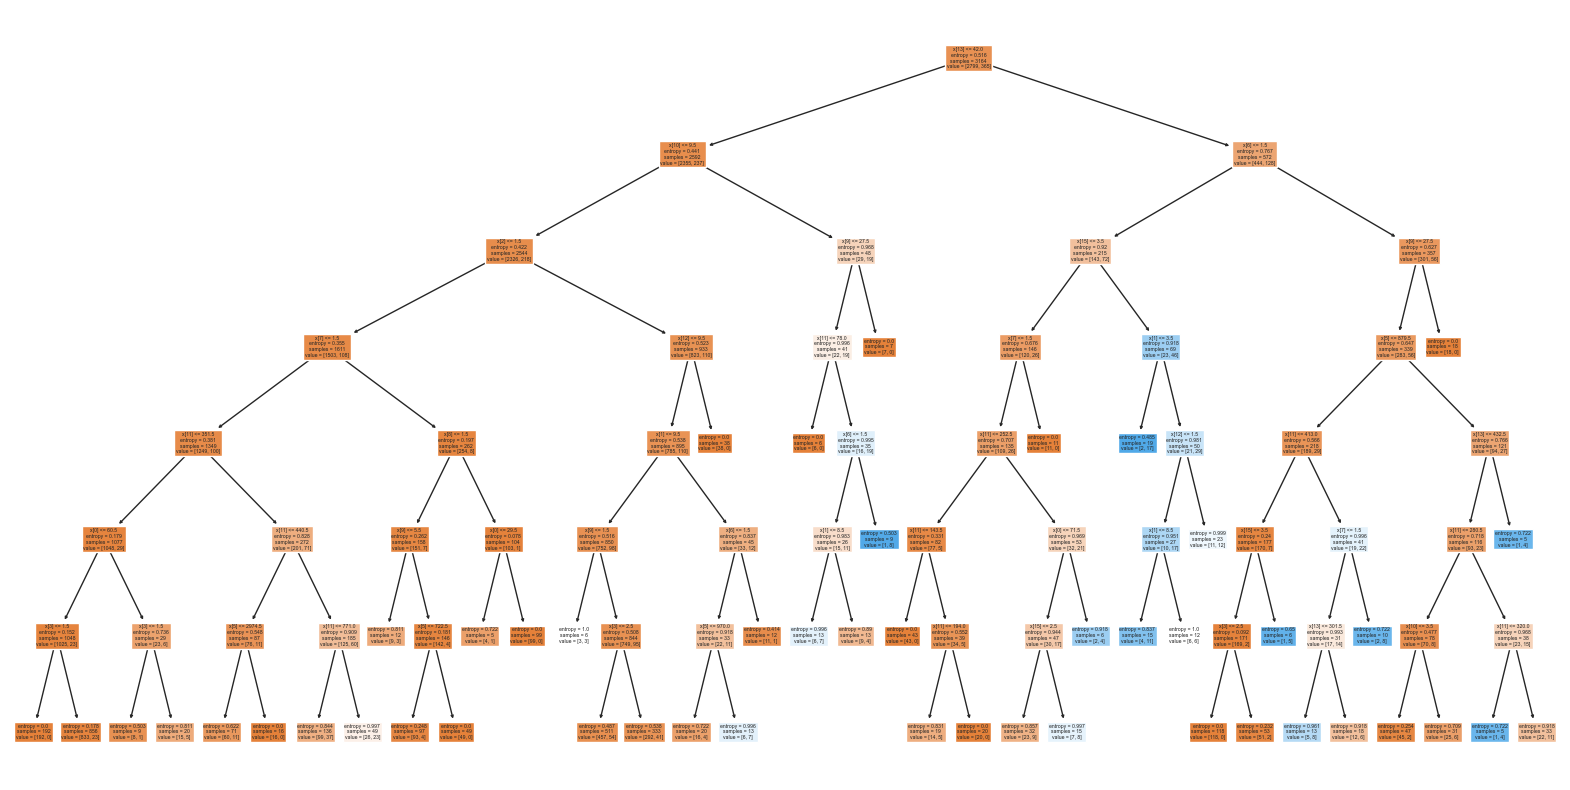

In [41]:
plt.figure(figsize=(20,10))
plot_tree(model_tree, filled=True)
plt.savefig('decision_tree.png')
plt.show()

### Tracé de l'importance des features

In [42]:
# Dataframe Features importances
df_feat2 = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : model_tree.feature_importances_})

df_feat2.sort_values(by=['Features_importances'], ascending=False)

,Features,Features_importances
11,duration,0.415381
15,poutcome,0.127967
13,pdays,0.120906
10,month,0.057291
6,housing,0.051329
9,day,0.040708
0,age,0.037174
2,marital,0.028701
1,job,0.026273
5,balance,0.025329


Text(0, 0.5, 'Feature names')

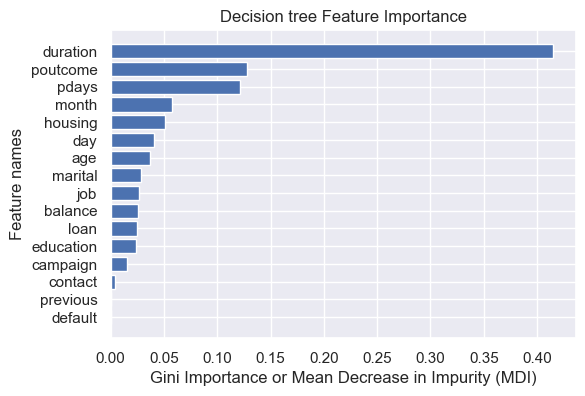

In [43]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat2.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat2['Features'], df_feat2['Features_importances'])
plt.title("Decision tree Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

# II -  Adaboost

###  Entrainement du modele

In [69]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning
# weak_learner = DecisionTreeClassifier(max_depth = 1)

ab_clf = AdaBoostClassifier(random_state=42) # Par défaut base_estimator=weak_learner, donc pas besoin de l'appeler

# Grid Search to Search through all the combination of values
param_grid_ada_clf = {
    'n_estimators': [10, 50, 500, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1], # 0.0002, 0.002, 0.02, 0.2, 0.0003, 0.003, 0.03, 0.3, ...., 0.0009, 0.009, 0.09, 0.9, 
    'algorithm': ['SAMME', 'SAMME.R']
}

CV_ada_clf = GridSearchCV(estimator=ab_clf, 
                          param_grid=param_grid_ada_clf, 
                          scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
                          # error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
                          # return_train_score=False,
                          cv=5, 
                          verbose=2, 
                          n_jobs=-1)

In [71]:
# Entrainement du modèle
model_ada_clf = CV_ada_clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [72]:
# To view all the parameters used
CV_ada_clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 50, 500, 1000]},
             scoring='accuracy', verbose=2)>

In [73]:
# We can view the best parameters from fitting the grid search:
print(CV_ada_clf.best_params_) 

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}


In [ ]:
# print(CV_ada_clf.best_score_) 
# print(CV_ada_clf.cv_results_)

###  Evaluation du modele

In [44]:
# Now let's run the model with this parameters
model_ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, algorithm='SAMME.R', random_state=42) # base_estimator=weak_learner,

# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_ada.fit(X_train, y_train)
# Prédiction avec les données test
y_pred_ada = model_ada.predict(X_test)

# Calcul du score du modèle 
print("Accuracy adaboostclassifier (data test): {:0.2f}%.".format(accuracy_score(y_test, y_pred_ada) * 100))

Accuracy adaboostclassifier (data test): 89.39%.


### Evaluation avec d'autres métriques

In [45]:
# roc = roc_auc_score(y_test, y_pred_ada, pos_label='M')
acc_adaboost = accuracy_score(y_test, y_pred_ada)
prec_adaboost = precision_score(y_test, y_pred_ada, pos_label='yes')
rec_adaboost = recall_score(y_test, y_pred_ada, pos_label='yes')
f1_adaboost = f1_score(y_test, y_pred_ada, pos_label='yes')

model_results_adaboost = pd.DataFrame([['Adaboost', acc_adaboost, prec_adaboost, rec_adaboost, f1_adaboost]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results_adaboost

,Model,Accuracy,Precision,Recall,F1 Score
0,Adaboost,0.893884,0.59375,0.24359,0.345455


### Matrice de confusion

[[1175   26]
 [ 118   38]]


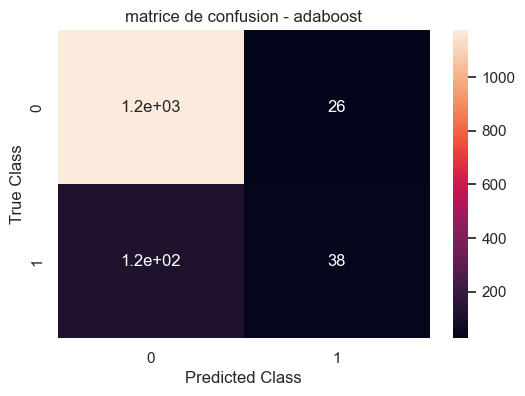

In [46]:
matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print(matrix_adaboost)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_adaboost, annot=True)
plt.title('matrice de confusion - adaboost')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

### Tracé de l'importance des features

In [47]:
# Dataframe Features importances
df_feat_ada = pd.DataFrame({'Features' : X_train.columns,
             'Features_importances' : model_ada.feature_importances_})

df_feat_ada.sort_values(by=['Features_importances'], ascending=False, inplace=True)
df_feat_ada

,Features,Features_importances
11,duration,0.248
10,month,0.182
8,contact,0.088
5,balance,0.066
0,age,0.064
14,previous,0.064
13,pdays,0.060
9,day,0.054
12,campaign,0.032
3,education,0.030


Text(0, 0.5, 'Feature names')

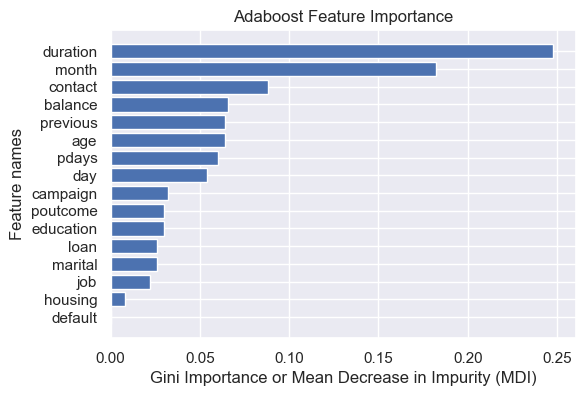

In [48]:
# Plot Features_importances' (Gini importance)
  # Note :Gini importance Mean Decrease in Impurity (MDI) counts the times a feature is used to split a node,
  # weighted by the number of samples it splits
df_feat_ada.sort_values(by='Features_importances', ascending=True, inplace=True)
plt.figure(figsize=(6, 4))
plt.barh(df_feat_ada['Features'], df_feat_ada['Features_importances'])
plt.title("Adaboost Feature Importance")
plt.xlabel('Gini Importance or Mean Decrease in Impurity (MDI)')
plt.ylabel('Feature names')

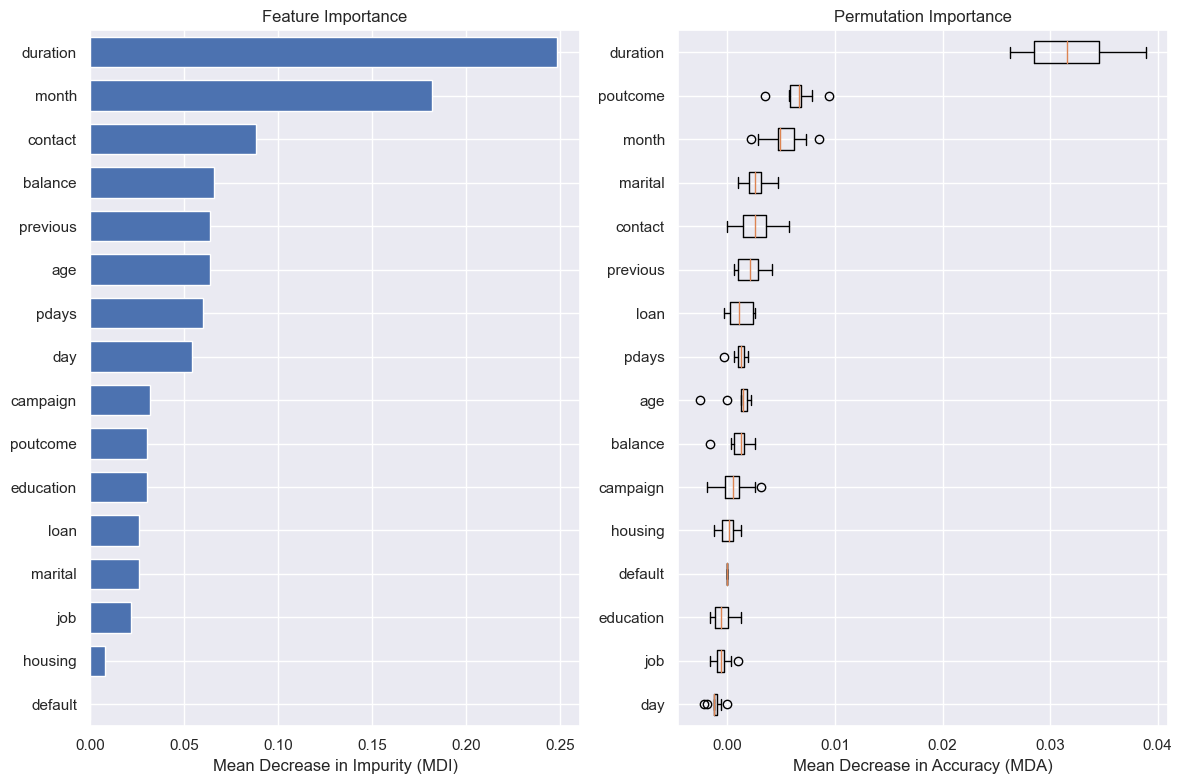

In [49]:
# Feature Importance (MDI) vs Generate Permutation Importance plot
result = permutation_importance(model_ada, X_train, y_train, n_repeats=10, random_state=42)
# n_repeats : Number of times to permute a feature.
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(model_ada.feature_importances_)
tree_indices = np.arange(0, len(model_ada.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, model_ada.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(model_ada.feature_importances_)))
ax1.set_xlabel('Mean Decrease in Impurity (MDI)')
ax1.set_title('Feature Importance')

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train.columns[perm_sorted_idx])
ax2.set_xlabel('Mean Decrease in Accuracy (MDA)')
ax2.set_title('Permutation Importance')

fig.tight_layout()
plt.show()

# V -  XGBoost Classifier

###  Entrainement du modele

In [50]:
# Hyperparameter Tuning
    # Remarque : This code takes runs in a long time
# parameters we are fine tuning


param_grid_xgb = {
    'n_estimators': [100, 250, 500, 750, 1000],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'colsample_bytree': [1], #[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bylevel': [1], #[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    #'colsample_bynode':
    #'subsample': [0.8, 0.7, 1],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': range(1,6,2), 
    'reg_lambda': [1], #[0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'reg_gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
    'reg_alpha': [0]  #[0.1, 0.5, 1]  
    }

xgb = XGBClassifier( # XGBRegressor works also 
    random_state=123, 
    objective='binary:logistic' #binary:logistic –logistic regression for binary classification
    )

# Grid Search to Search through all the combination of values
CV_xgb = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid_xgb, 
    scoring='accuracy', # scoring = ['roc_auc', 'precision', 'f1', ...], il calcule l'accuracy
    error_score='raise', # il calcule l'erreur du cv. Il est différent de OOB error
    return_train_score=False,
    cv=5,
    verbose = 2,
    n_jobs=-1
)

In [52]:
# Transformer la variable sortie (y_train et y_test) en binaire (0, 1) avec 'no'=0 et 'yes'=1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_test = le.fit_transform(y_test)

In [54]:
# Entrainement du modèle
model_xgb = CV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
[17:56:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "reg_gamma" } are not used.



In [56]:
# To view all the parameters used
CV_xgb.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=123, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [1], 'colsample_bytree': [1],
    

In [58]:
# We can view the best parameters from fitting the grid search:
print(CV_xgb.best_params_) 

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 500, 'reg_alpha': 0, 'reg_gamma': 0.0, 'reg_lambda': 1}


In [ ]:
# print(CV_ada_clf.best_score_) 
# print(CV_ada_clf.cv_results_)

###  Evaluation du modele

In [61]:
# Now let's run the model with this parameters
model_xgb = XGBClassifier( # XGBRegressor works also
    n_estimators=500,
    random_state=123, 
    objective='binary:logistic', #binary:logistic –logistic regression for binary classification
    max_depth=6,
    colsample_bylevel=1, 
    colsample_bytree=1, 
    min_child_weight=3,
    learning_rate=0.01,
    reg_lambda=1, 
    min_split_loss=0.2, # mean gamma
    reg_alpha=0)
                          
# Entrainement du modèle d'arbre avec les meilleurs paramètres 
model_xgb.fit(X_train, y_train)
# Prédiction avec les données test
y_pred_xgb = model_xgb.predict(X_test)

# Calcul du score du modèle 
print("Accuracy xgboostclassifier (data test): {:0.2f}%.".format(accuracy_score(y_test, y_pred_xgb) * 100))

Accuracy xgboostclassifier (data test): 90.20%.


In [62]:
roc_xgb = roc_auc_score(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

model_results_xgb = pd.DataFrame([['Xgboost', acc_xgb, prec_xgb, rec_xgb, f1_xgb, roc_xgb]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
model_results_xgb

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Xgboost,0.90199,0.641975,0.333333,0.438819,0.654593


### Matrice de confusion

[[1172   29]
 [ 104   52]]


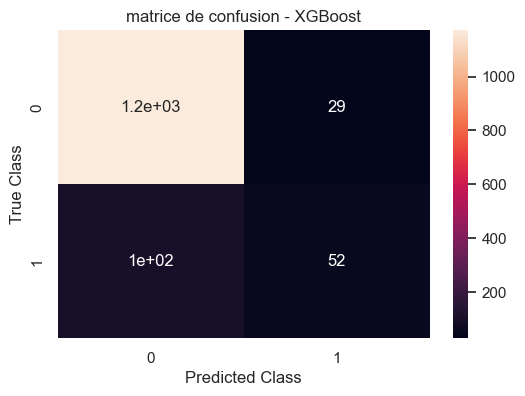

In [63]:
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(matrix_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_xgb, annot=True)
plt.title('matrice de confusion - XGBoost')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

# II -  Comparaison des performances des modèles

In [67]:
# score obtenu sur le meme data test avec différents modèles
scores = pd.DataFrame({'modèles': ['Random forest', 'Decision Tree', 'Adaboost', 'XGBoost'], 
                         'accuracy': [acc_random_forest, acc_decision_tree, acc_adaboost, acc_xgb]})
scores


,modèles,accuracy
0,Random forest,0.897568
1,Decision Tree,0.885041
2,Adaboost,0.893884
3,XGBoost,0.901990


In [87]:
model = [random_forest, model_tree] # model = [logm, classifier, knn]
models=[y_predict_rdf,  y_predict_dtc] # models=[y_pred_log,  y_pred_dt, y_pred]
label=['Random Forest','Decision Tree'] # label=['Logistic','Decision Tree','KNN']

# plotting ROC curves
plt.figure(figsize=(12, 15))
m=np.arange(2) # m=np.arange(3)

for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test, models[m], pos_label="yes")
    auc = metrics.roc_auc_score(y_test, model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
    
plt.plot([0, 1], [0, 1],color='deeppink',linestyle='--')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.xlabel('1-Specificity(False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=16)
plt.title('Receiver Operating Characteristic',fontsize=16)
plt.legend(loc="lower right")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<Figure size 1200x1500 with 0 Axes>